In [2]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score



In [15]:
states = pd.read_csv('../ml/state_poverty_and_income.csv')

In [9]:
states.head()

,AREA,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,...,SAEPOVRT5_17R_PT,SAEPOVRT5_17R_UB90,SAEPOVRTALL_LB90,SAEPOVRTALL_MOE,SAEPOVRTALL_PT,SAEPOVRTALL_UB90,SAEPOVU_0_17,SAEPOVU_0_4,SAEPOVU_5_17R,SAEPOVU_ALL
0,1,Alabama,00-0000,All Occupations,total,1922570,0.4,1000.0,1.0,20.76,...,22.8,23.8,16.5,0.4,16.9,17.3,1079561.0,285282.0,790771.0,4752519.0
638,2,Alaska,00-0000,All Occupations,total,318170,0.9,1000.0,1.0,27.77,...,13.3,14.7,10.4,0.6,11.0,11.6,179595.0,51852.0,126482.0,720474.0
1112,4,Arizona,00-0000,All Occupations,total,2704050,0.5,1000.0,1.0,23.15,...,19.7,20.5,14.6,0.3,14.9,15.2,1601125.0,424424.0,1169122.0,6856072.0
1764,5,Arkansas,00-0000,All Occupations,total,1200130,0.7,1000.0,1.0,19.49,...,21.2,22.4,15.9,0.4,16.3,16.7,693313.0,186637.0,503209.0,2916343.0
2364,6,California,00-0000,All Occupations,total,16695010,0.2,1000.0,1.0,27.50,...,17.4,17.8,13.2,0.1,13.3,13.4,8922696.0,2414832.0,6466584.0,38793030.0


In [17]:
states = states[['STATE', 'OCC_TITLE', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75', 'LOC_QUOTIENT', 'SAEPOVRTALL_PT']]

In [21]:
states = states[states['OCC_TITLE'] == 'All Occupations'].drop(columns = 'OCC_TITLE')

In [23]:
states = pd.get_dummies(states, columns = ['STATE'], drop_first = True)

In [24]:
states

,JOBS_1000,A_MEAN,A_MEDIAN,A_PCT75,LOC_QUOTIENT,SAEPOVRTALL_PT,STATE_Alaska,STATE_Arizona,STATE_Arkansas,STATE_California,...,STATE_South Dakota,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Vermont,STATE_Virginia,STATE_Washington,STATE_West Virginia,STATE_Wisconsin,STATE_Wyoming
0,1000.0,43170.0,32800.0,52020.0,1.0,16.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,1000.0,57750.0,47560.0,72630.0,1.0,11.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,1000.0,48160.0,36270.0,57740.0,1.0,14.9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1764,1000.0,40530.0,30810.0,48000.0,1.0,16.3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2364,1000.0,57190.0,40980.0,70360.0,1.0,13.3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146471,1000.0,62330.0,47200.0,77450.0,1.0,10.3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
147131,1000.0,68740.0,50450.0,80260.0,1.0,9.9,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
147786,1000.0,46490.0,36860.0,57950.0,1.0,16.8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
148360,1000.0,53120.0,45000.0,61660.0,1.0,10.8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
target = 'SAEPOVRTALL_PT'
X = states.drop([target], axis=1)
y = states[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
model.fit(X_train, y_train)
score= model.score(X_train, y_train)
score_val = model.score(X_test, y_test)
print(f'score: {score}, score_val: {score_val}')

score: 0.9662305303222788, score_val: 0.8214541442744522


In [28]:
y_pred = model.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print(f'Out-of-Bag Score: {model.oob_score_}')

MAE:  0.9234999999999993
MSE:  1.4437475000000037
Out-of-Bag Score: 0.7455690722463311


In [105]:
X_test[X_test['AREA'] == 1]

,AREA,JOBS_1000,A_MEAN,A_MEDIAN,A_PCT75,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
60852,1,0.025,57250.0,60680.0,60690.0,1.16,27.52,57250.0,1.7,24.39,26.25,29.17,29.18,29.18,50730.0,54600.0,60680.0,60690.0,60690.0
620,1,0.175,42470.0,44980.0,50520.0,0.80,20.42,42470.0,4.4,12.24,15.94,21.63,24.29,26.22,25460.0,33150.0,44980.0,50520.0,54550.0
209,1,1.311,88360.0,86350.0,104590.0,0.83,42.48,88360.0,2.0,27.22,33.46,41.51,50.29,60.20,56620.0,69600.0,86350.0,104590.0,125210.0
491,1,5.576,50750.0,49110.0,61830.0,2.33,24.40,50750.0,1.3,14.65,18.15,23.61,29.73,35.78,30470.0,37760.0,49110.0,61830.0,74420.0
89849,1,0.034,117740.0,117770.0,150160.0,0.27,56.61,117740.0,4.5,25.44,41.98,56.62,72.19,81.21,52910.0,87310.0,117770.0,150160.0,168920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90233,1,7.617,65640.0,62050.0,79860.0,1.77,31.56,65640.0,1.0,17.41,22.68,29.83,38.40,48.39,36210.0,47180.0,62050.0,79860.0,100640.0
119123,1,0.048,36450.0,34750.0,39160.0,0.41,17.52,36450.0,5.3,10.84,14.76,16.71,18.83,24.17,22540.0,30690.0,34750.0,39160.0,50280.0
60458,1,0.040,46720.0,45780.0,50630.0,0.80,22.46,46720.0,2.5,16.11,19.76,22.01,24.34,29.46,33510.0,41110.0,45780.0,50630.0,61280.0
90352,1,0.063,58480.0,53030.0,71420.0,0.83,28.11,58480.0,6.6,18.44,21.56,25.50,34.34,42.02,38360.0,44850.0,53030.0,71420.0,87400.0


In [111]:
states = states[states['AREA'] == 1]
states

# states_list = list(states['AREA'].unique())
# target = "SAEPOVRTALL_PT"
# for state in states_list:
#     states = states[states['AREA'] == state]

    # X = states.drop([target], axis=1)
    # y = states[[target]]

# area_list = list(X_test['AREA'].unique())
# for area in area_list:
#     y_pred = model.predict(X_test[X_test['AREA'] == area])
#     print('MAE: ', mean_absolute_error(y_test, y_pred))
#     print('MSE: ', mean_squared_error(y_test, y_pred))
#     print(f'Out-of-Bag Score: {model.oob_score_}')

,AREA,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,...,SAEPOVRT5_17R_PT,SAEPOVRT5_17R_UB90,SAEPOVRTALL_LB90,SAEPOVRTALL_MOE,SAEPOVRTALL_PT,SAEPOVRTALL_UB90,SAEPOVU_0_17,SAEPOVU_0_4,SAEPOVU_5_17R,SAEPOVU_ALL
0,1,Alabama,00-0000,All Occupations,total,1922570,0.4,1000.000,1.00,20.76,...,22.8,23.8,16.5,0.4,16.9,17.3,1079561.0,285282.0,790771.0,4752519.0
1,1,Alabama,11-0000,Management Occupations,major,69950,1.0,36.385,0.71,53.44,...,22.8,23.8,16.5,0.4,16.9,17.3,1079561.0,285282.0,790771.0,4752519.0
2,1,Alabama,11-2021,Marketing Managers,detailed,540,6.4,0.280,0.18,59.34,...,22.8,23.8,16.5,0.4,16.9,17.3,1079561.0,285282.0,790771.0,4752519.0
3,1,Alabama,11-2022,Sales Managers,detailed,2220,5.7,1.157,0.44,60.88,...,22.8,23.8,16.5,0.4,16.9,17.3,1079561.0,285282.0,790771.0,4752519.0
4,1,Alabama,11-2031,Public Relations and Fundraising Managers,detailed,430,7.6,0.222,0.47,45.32,...,22.8,23.8,16.5,0.4,16.9,17.3,1079561.0,285282.0,790771.0,4752519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119460,1,Alabama,53-7064,"Packers and Packagers, Hand",detailed,6560,4.1,3.402,0.82,12.44,...,21.6,22.5,15.9,0.4,16.3,16.7,1104114.0,283749.0,816687.0,4920612.0
119461,1,Alabama,53-7065,Stockers and Order Fillers,detailed,31990,1.8,16.593,0.95,14.23,...,21.6,22.5,15.9,0.4,16.3,16.7,1104114.0,283749.0,816687.0,4920612.0
119462,1,Alabama,53-7072,"Pump Operators, Except Wellhead Pumpers",detailed,200,13.4,0.105,1.40,24.42,...,21.6,22.5,15.9,0.4,16.3,16.7,1104114.0,283749.0,816687.0,4920612.0
119463,1,Alabama,53-7081,Refuse and Recyclable Material Collectors,detailed,2450,6.5,1.271,1.42,15.42,...,21.6,22.5,15.9,0.4,16.3,16.7,1104114.0,283749.0,816687.0,4920612.0


In [36]:
r2 = r2_score(y_test, y_pred)
r2

0.9507020223154418

In [33]:
y_pred

array([12.225, 15.26 ,  9.561, ..., 13.36 ,  9.722, 12.345])

In [22]:
y_test.values

array([11.5, 15.5, 10.3, ..., 13.9,  9.4, 12.1])

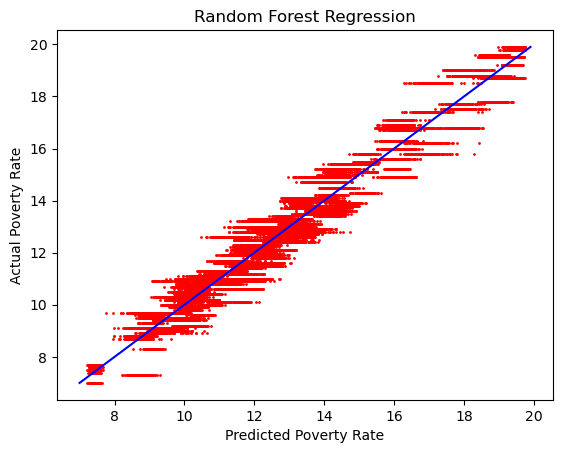

In [23]:
plt.scatter(y_pred, y_test, color = 'red', s=1)
plt.title('Random Forest Regression')
plt.xlabel('Predicted Poverty Rate')
plt.ylabel('Actual Poverty Rate')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1,p2], [p1,p2], 'b-')

plt.show()


In [24]:
X
X.dtypes
states[['SAEPOVRTALL_PT', 'AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75']].head()

,SAEPOVRTALL_PT,AREA,JOBS_1000,A_MEAN,A_MEDIAN,A_PCT75
0,16.9,1,1000.000,43170.0,32800.0,52020.0
1,16.9,1,36.385,111150.0,96980.0,133360.0
2,16.9,1,0.280,123430.0,110350.0,155860.0
3,16.9,1,1.157,126630.0,111680.0,153960.0
4,16.9,1,0.222,94270.0,82400.0,106530.0


In [25]:
def predict(area, jobs_1000, a_mean, a_median, a_pct75, x = X):
    newdf = X[X['AREA'] == area].head(1)
    newdf['JOBS_1000'] = jobs_1000
    newdf['A_MEAN'] = a_mean
    newdf['A_MEDIAN'] = a_median
    newdf['A_PCT75'] = a_pct75
    result = model.predict(newdf)
    return result

print(predict(1, 36.385, 111150.0, 96980.0, 133360.0))
#     result = model.predict(newdf)
#     return result

# print(predict(2021, 78437, 'Alaska'))

[16.341]


In [31]:
filename = "../ml/viking_model.pickle"

pickle.dump(model, open(filename, "wb"))


In [27]:
loaded_model = pickle.load(open(filename, "rb"))

In [32]:
features = ['AREA', 'JOBS_1000', 'A_MEAN', 'A_MEDIAN', 'A_PCT75']
target = "SAEPOVRTALL_PT"
X = states.drop([target], axis=1)
X = X.select_dtypes(exclude=['object'])
y = states[target]
X = states[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
loaded_model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
loaded_model.fit(X_train, y_train)
score= loaded_model.score(X_train, y_train)
score_val = loaded_model.score(X_test, y_test)
print(f'score: {score}, score_val: {score_val}')

score: 0.9931726979449461, score_val: 0.9507020223154418
